In [ ]:
!unzip /content/Fashion_data.zip

Se truncaron las últimas líneas 5000 del resultado de transmisión.
  inflating: Fashion_data/myntradataset/images/5813.jpg  
  inflating: Fashion_data/myntradataset/images/58131.jpg  
  inflating: Fashion_data/myntradataset/images/58132.jpg  
  inflating: Fashion_data/myntradataset/images/58133.jpg  
  inflating: Fashion_data/myntradataset/images/58135.jpg  
  inflating: Fashion_data/myntradataset/images/58136.jpg  
  inflating: Fashion_data/myntradataset/images/58137.jpg  
  inflating: Fashion_data/myntradataset/images/58138.jpg  
  inflating: Fashion_data/myntradataset/images/58139.jpg  
  inflating: Fashion_data/myntradataset/images/5814.jpg  
  inflating: Fashion_data/myntradataset/images/58140.jpg  
  inflating: Fashion_data/myntradataset/images/58141.jpg  
  inflating: Fashion_data/myntradataset/images/58143.jpg  
  inflating: Fashion_data/myntradataset/images/58144.jpg  
  inflating: Fashion_data/myntradataset/images/58145.jpg  
  inflating: Fashion_data/myntradataset/images/581

In [ ]:
import os
import shutil
import pickle
import cv2
import numpy as np
from PIL import Image
from concurrent.futures import ThreadPoolExecutor

# Scikit-learn
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity

# TensorFlow / Keras
import faiss
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image, ImageDataGenerator
from tensorflow.keras.models import Model, Sequential, load_model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam


In [ ]:

# Configuración inicial
DATASET_PATH = "/content/Fashion_data/images"
OUTPUT_PATH = "/content/clasificado"
NUM_CLUSTERS = 10  # Ajusta según la cantidad esperada de categorías


def load_images(dataset_path):
    images = []
    filenames = []

    for i, file in enumerate(os.listdir(dataset_path)):
        if i >= 2000:  # Detenerse después de 2000 imágenes
            break
        if file.endswith((".jpg", ".png", ".jpeg")):
            img_path = os.path.join(dataset_path, file)
            img = image.load_img(img_path, target_size=(224, 224))
            img_array = image.img_to_array(img)
            img_array = np.expand_dims(img_array, axis=0)
            img_array = preprocess_input(img_array)
            images.append(img_array)
            filenames.append(img_path)

    return np.vstack(images), filenames



def extract_features(images):
    base_model = VGG16(weights="imagenet", include_top=False)
    model = Model(inputs=base_model.input, outputs=base_model.output)
    features = model.predict(images)
    features = features.reshape(features.shape[0], -1)  # Aplanamos
    return features


def cluster_images(features, filenames):
    kmeans = KMeans(n_clusters=NUM_CLUSTERS, random_state=42, n_init=10)
    labels = kmeans.fit_predict(features)

    # Crear carpetas y mover imágenes
    for i, file in enumerate(filenames):
        cluster_dir = os.path.join(OUTPUT_PATH, f"Cluster_{labels[i]}")
        os.makedirs(cluster_dir, exist_ok=True)
        shutil.copy(file, cluster_dir)
    print("Clasificación completada. Imágenes organizadas en", OUTPUT_PATH)


# Ejecutar el flujo
images, filenames = load_images(DATASET_PATH)
features = extract_features(images)
cluster_images(features, filenames)


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 1097s 17s/step
Clasificación completada. Imágenes organizadas en /content/clasificado


In [5]:
!unzip /content/fashion_data_clasificado.zip

Archive:  /content/fashion_data_clasificado.zip
replace content/clasificado/Cluster_6/58553.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: Y
  inflating: content/clasificado/Cluster_6/58553.jpg  
replace content/clasificado/Cluster_6/42695.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: Y
  inflating: content/clasificado/Cluster_6/42695.jpg  
replace content/clasificado/Cluster_6/17597.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: content/clasificado/Cluster_6/17597.jpg  
  inflating: content/clasificado/Cluster_6/55284.jpg  
  inflating: content/clasificado/Cluster_6/49167.jpg  
  inflating: content/clasificado/Cluster_6/13002.jpg  
  inflating: content/clasificado/Cluster_6/59580.jpg  
  inflating: content/clasificado/Cluster_6/19894.jpg  
  inflating: content/clasificado/Cluster_6/21323.jpg  
  inflating: content/clasificado/Cluster_6/55078.jpg  
  inflating: content/clasificado/Cluster_6/58148.jpg  
  inflating: content/clasificado/Cluster_6/44215.jpg  
  inflating: content/clas

In [2]:
!zip -r fashion_data_clasificado.zip /content/clasificado


	zip warning: name not matched: /content/clasificado

zip error: Nothing to do! (try: zip -r fashion_data_clasificado.zip . -i /content/clasificado)


In [7]:
!unzip /content/fashion_data_clasificado.zip -d /content/fashion_data_clasificado


Archive:  /content/fashion_data_clasificado.zip
replace /content/fashion_data_clasificado/content/clasificado/Cluster_6/58553.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: /content/fashion_data_clasificado/content/clasificado/Cluster_6/58553.jpg  
  inflating: /content/fashion_data_clasificado/content/clasificado/Cluster_6/42695.jpg  
  inflating: /content/fashion_data_clasificado/content/clasificado/Cluster_6/17597.jpg  
  inflating: /content/fashion_data_clasificado/content/clasificado/Cluster_6/55284.jpg  
  inflating: /content/fashion_data_clasificado/content/clasificado/Cluster_6/49167.jpg  
  inflating: /content/fashion_data_clasificado/content/clasificado/Cluster_6/13002.jpg  
  inflating: /content/fashion_data_clasificado/content/clasificado/Cluster_6/59580.jpg  
  inflating: /content/fashion_data_clasificado/content/clasificado/Cluster_6/19894.jpg  
  inflating: /content/fashion_data_clasificado/content/clasificado/Cluster_6/21323.jpg  
  inflating: /content/fashio

In [9]:


# Configuración inicial
DATASET_PATH = "ruta/a/tu/carpeta_de_imagenes"
OUTPUT_PATH = "/content/fashion_data_clasificado/content/clasificado"
NUM_CLUSTERS = 10  # Número de categorías
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 10

def train_cnn():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(NUM_CLUSTERS, activation='softmax')
    ])

    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

    train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
    train_generator = train_datagen.flow_from_directory(OUTPUT_PATH, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical', subset='training')
    validation_generator = train_datagen.flow_from_directory(OUTPUT_PATH, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical', subset='validation')

    model.fit(train_generator, validation_data=validation_generator, epochs=EPOCHS)
    model.save("cnn_model.h5")
    print("Modelo CNN guardado como cnn_model.h5")

# Transfer Learning con VGG16
def train_vgg16():
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    base_model.trainable = False

    model = Sequential([
        base_model,
        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(NUM_CLUSTERS, activation='softmax')
    ])

    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

    train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
    train_generator = train_datagen.flow_from_directory(OUTPUT_PATH, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical', subset='training')
    validation_generator = train_datagen.flow_from_directory(OUTPUT_PATH, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical', subset='validation')

    model.fit(train_generator, validation_data=validation_generator, epochs=EPOCHS)
    model.save("vgg16_model.h5")
    print("Modelo VGG16 guardado como vgg16_model.h5")


# Entrenar modelos
train_cnn()
train_vgg16()


Found 1603 images belonging to 10 classes.
Found 397 images belonging to 10 classes.
Epoch 1/10


KeyboardInterrupt: 

In [16]:
!pip install faiss-cpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.7/30.7 MB 30.5 MB/s eta 0:00:00


Cargando características guardadas...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step

🔍 Imágenes recomendadas:
/content/fashion_data_clasificado/content/clasificado/Cluster_4/9768.jpg - Similitud: 100.00%
/content/fashion_data_clasificado/content/clasificado/Cluster_4/13851.jpg - Similitud: 100.00%
/content/fashion_data_clasificado/content/clasificado/Cluster_4/19112.jpg - Similitud: 100.00%
/content/fashion_data_clasificado/content/clasificado/Cluster_4/6582.jpg - Similitud: 100.00%
/content/fashion_data_clasificado/content/clasificado/Cluster_4/2026.jpg - Similitud: 100.00%


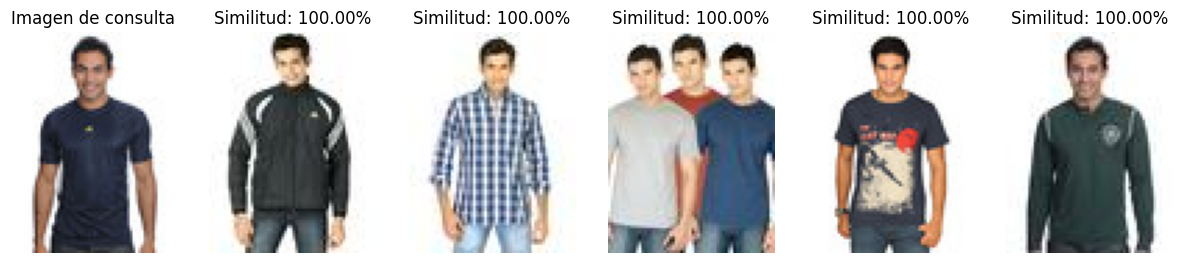

In [6]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from sklearn.metrics.pairwise import cosine_similarity
from PIL import Image

# Configuración
MODEL_PATH = "/content/cnn_model.h5"  # Ruta del modelo entrenado
DATASET_PATH = "/content/fashion_data_clasificado/content/clasificado"  # Carpeta con imágenes clasificadas
FEATURES_FILE = "/content/dataset_features.npz"  # Archivo para almacenar características
IMG_SIZE = (224, 224)

# Cargar el modelo entrenado
model = load_model(MODEL_PATH)

# Función para extraer características de una imagen
def extract_features(img_path, model):
    img = image.load_img(img_path, target_size=IMG_SIZE)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0  # Normalización
    features = model.predict(img_array)
    return features.flatten()

# Función para cargar o generar características del dataset
def load_or_generate_features(dataset_path, model, features_file):
    if os.path.exists(features_file):
        print("Cargando características guardadas...")
        data = np.load(features_file, allow_pickle=True)
        return data["features"], data["paths"].tolist()

    print("Extrayendo características y guardando en archivo...")
    image_paths = []
    feature_list = []

    for root, _, files in os.walk(dataset_path):
        for file in files:
            if file.endswith(('.jpg', '.png', '.jpeg')):
                img_path = os.path.join(root, file)
                image_paths.append(img_path)
                feature_list.append(extract_features(img_path, model))

    # Guardar en un archivo para futura reutilización
    np.savez(features_file, features=np.array(feature_list), paths=np.array(image_paths, dtype=object))
    return np.array(feature_list), image_paths

# Obtener características del dataset
dataset_features, image_paths = load_or_generate_features(DATASET_PATH, model, FEATURES_FILE)

# Función de recomendación
def recommend_images(query_image_path, model, dataset_features, image_paths, top_n=5):
    query_features = extract_features(query_image_path, model)
    similarities = cosine_similarity([query_features], dataset_features)[0]
    best_matches = np.argsort(similarities)[-top_n:][::-1]  # Top N más similares
    recommended_images = [image_paths[i] for i in best_matches]
    similarity_percentages = [similarities[i] * 100 for i in best_matches]  # Convertir a porcentaje
    return recommended_images, similarity_percentages

# Ejemplo de uso
query_image = "/content/imagen2.jpg"  # Imagen a buscar
recommended_images, similarities = recommend_images(query_image, model, dataset_features, image_paths)

# Mostrar resultados en consola
print("\n🔍 Imágenes recomendadas:")
for img, similarity in zip(recommended_images, similarities):
    print(f"{img} - Similitud: {similarity:.2f}%")

# Mostrar imágenes con Matplotlib
fig, axes = plt.subplots(1, len(recommended_images) + 1, figsize=(15, 5))

# Mostrar la imagen de consulta
query_img = Image.open(query_image)
axes[0].imshow(query_img)
axes[0].set_title("Imagen de consulta")
axes[0].axis("off")

# Mostrar imágenes recomendadas
for i, (img, similarity) in enumerate(zip(recommended_images, similarities)):
    rec_img = Image.open(img)
    axes[i + 1].imshow(rec_img)
    axes[i + 1].set_title(f"Similitud: {similarity:.2f}%")
    axes[i + 1].axis("off")

plt.show()


In [14]:
!pip freeze > requirements.txt
!python --version > python_version.txt
!pip freeze > requirements.txt
